### IMPORTING DEPENDANCIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.DataFrame(pd.read_csv("advertising.csv"))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### EXPLORATORY DATA ANALYSIS

In [7]:
#Checking and removing the null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

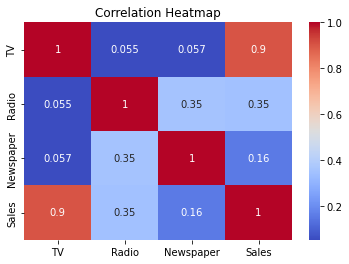

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

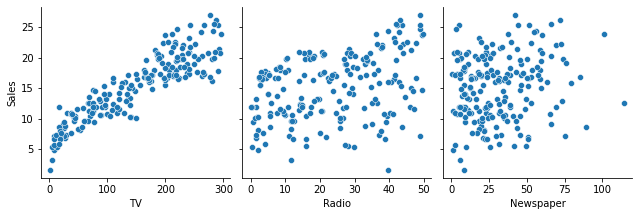

In [9]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height= 3, aspect=1 ,kind='scatter')
plt.show()



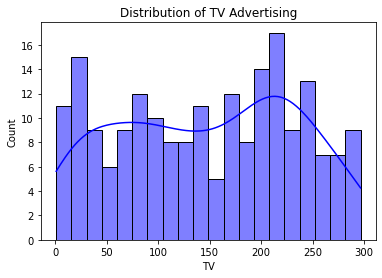

In [10]:
sns.histplot(df['TV'], bins=20, kde=True, color='blue')
plt.title('Distribution of TV Advertising')
plt.show()


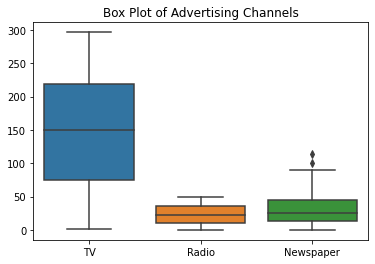

In [11]:
#box plots for outliers
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title('Box Plot of Advertising Channels')
plt.show()

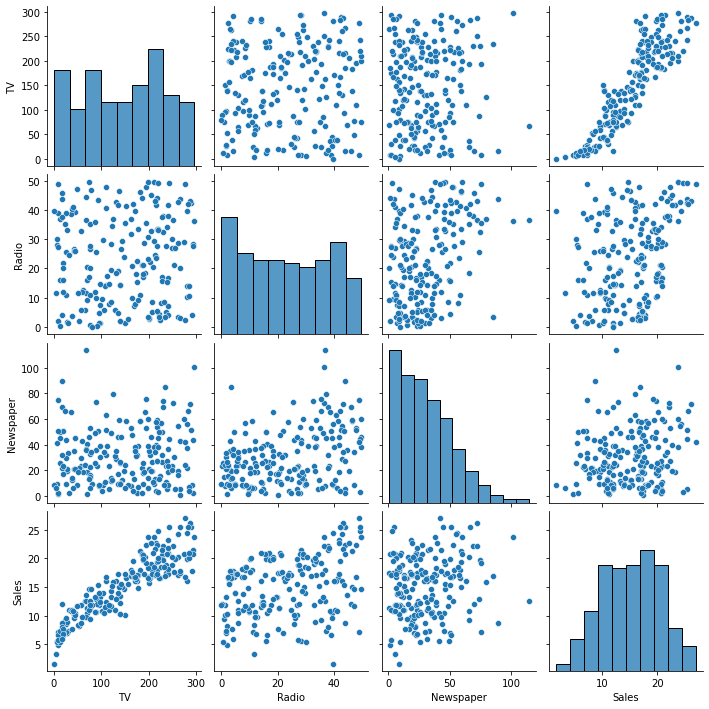

In [12]:
#Pairwise Relationships
sns.pairplot(df)
plt.show()

In [13]:
#Correlation With Sales
correlation_with_sales = df.corr()['Sales'].sort_values(ascending=False)
print(correlation_with_sales)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


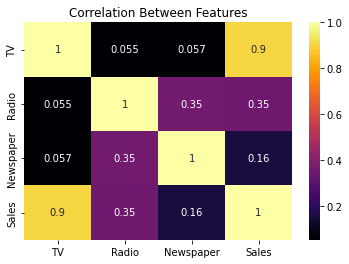

In [14]:
#Correlation Between Features
sns.heatmap(df.corr(), annot=True, cmap='inferno')
plt.title('Correlation Between Features')
plt.show()

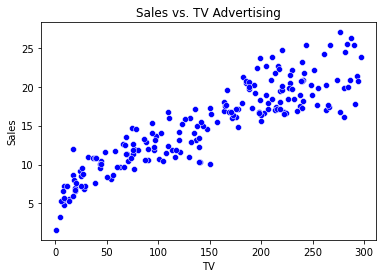

In [15]:
#Analysis of Sales vs. TV Advertising
sns.scatterplot(data=df, x='TV', y='Sales', color='blue')
plt.title('Sales vs. TV Advertising')
plt.show()

### MODEL BUILDING

In [55]:
x=df['TV']
y=df['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [56]:
x_train.head()

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
Name: TV, dtype: float64

In [57]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [58]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()



In [59]:
lr.params


const    7.007108
TV       0.055483
dtype: float64

In [60]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.71e-59
Time:                        20:36:00   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

In [68]:
##### from the above results, we are majorly concernced with the following values:
#1. The coefficient- which is stastically significant
#2. R-Squared- 0.813 which is a decent R-squared value.
#3. F-Statistic- Has a very low p value indicating that the model is statistically significant.

### MODEL EVALUATION

In [66]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)
r_squared = r2_score(y_test, y_pred)
r_squared


0.8025613034236981

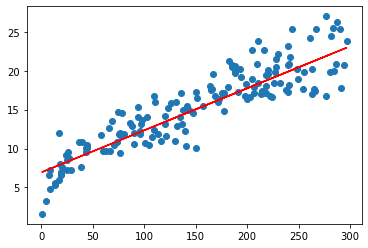

In [67]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()